
<font color='green' size = '6'>  Crime in Chicago </font>

Completed by: 
- Hua Fang
- Huiyan Shao
- Samit Panjwani 
- Qi Zhang
- Yingrong Li

<font color='green' size = '5'> Introduction </font>

In the first part of our project, we analyzed crime in chicago as a whole for a client that was ready to visit Chicago but had conerns over her safety. Now, we have been hired by a research firm to extended our analysis to include a time-series analysis, relationships between different variables, and some forecasting techniques. Additionally, they have stated they want us to focus on theft, battery, and criminal damage (since those three have the highest occurrences). Our analysis will help our client provide valuable research to their own clients. As such, the goal of this analysis is to determine if crime is decreasing over time, see the relationship between crime types and the arrest rates, and use our data to forecast projected theft numbers for 2018. 


Our first step in completing our analysis was to clean up the data. Due to the size of our dataset, the Python Notebook had difficulty running our code and the kernels would often die. As a result, deleted some of the columns that were not going to be used, in an effort to make the data file smaller and more concise. Below, we included the code we used in a Raw NBConvert Cell. Note- we used this code for our first project as well.



<font color='green' size = '5'> Importing the Relevent Modules </font>



Next, we imported all the relevent python modules we used when conducting our analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd

import sys
import seaborn as sns
sns.set_style('white')
import datetime as dt
from datetime import timedelta


import statsmodels.api as sm
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

from datetime import timedelta

from numpy.random import RandomState

from sklearn.neighbors import KernelDensity

import warnings
warnings.filterwarnings('ignore')

After importing the various Python Modules, we imported our data set and presented the first 5 rows to ensure that the proper columns were deleted. 

In [2]:
df=pd.read_csv('2008-2017.csv',error_bad_lines=False)
df.dropna()
df = df.set_index('Unnamed: 0')
df.index.name = None
df.head()

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
0,10508693,HZ250496,05/03/2016 11:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,2016
1,10508695,HZ250409,05/03/2016 09:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,2016
2,10508697,HZ250503,05/03/2016 11:31:00 PM,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,2016
3,10508698,HZ250424,05/03/2016 10:10:00 PM,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,2016
4,10508699,HZ250455,05/03/2016 10:00:00 PM,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,2016


Next, we converted the dates into the format required for panda. Note- we did this for the first project as well. 

In [3]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %H:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
df.head(1)

,ID,Case Number,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
Date,,,,,,,,,,,,,,
2016-05-03 11:40:00,10508693,HZ250496,2016-05-03 11:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,2016


Now that we done the necessary importing and general date conversion, we can begin our analyses. However, we first ensured that the count for all the columns were the same (as one way to check the data had been cleaned properly and was ready to be used. As we can see from below, the 'count' of rows for each column is the same. The one column which is different is 'Community Area', but we did not use this column in our analysis. As such, we chose to proceed with our data. 

In [4]:
df['NewDate']=pd.to_datetime(df['Date']).dt.to_period('m')
crimes=df.loc[df.Year!=2017]
crimes.describe()

,ID,Beat,District,Ward,Community Area,Year
count,2.986572e+06,2.986572e+06,2.986529e+06,2.986519e+06,2.985703e+06,2.986572e+06
mean,8.370095e+06,1.179226e+03,1.131170e+01,2.277325e+01,3.771462e+01,2.011575e+03
std,1.410846e+06,6.997236e+02,6.928235e+00,1.376403e+01,2.154943e+01,2.566675e+00
min,4.379000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.008000e+03
25%,7.195009e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,2.009000e+03
50%,8.354140e+06,1.032000e+03,1.000000e+01,2.200000e+01,3.200000e+01,2.011000e+03
75%,9.557673e+06,1.723000e+03,1.700000e+01,3.400000e+01,5.800000e+01,2.014000e+03
max,1.082787e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,2.016000e+03


Finally, we plotted a heatmap to show the correlation of our data. From the heatmap below, we can see that the columns with geophraical information ('Beat', 'District', and 'Ward') are positively correlated. As such, we are can have more confidence in the data, as we confirmed that there are no glaring errors in the entry of data. 

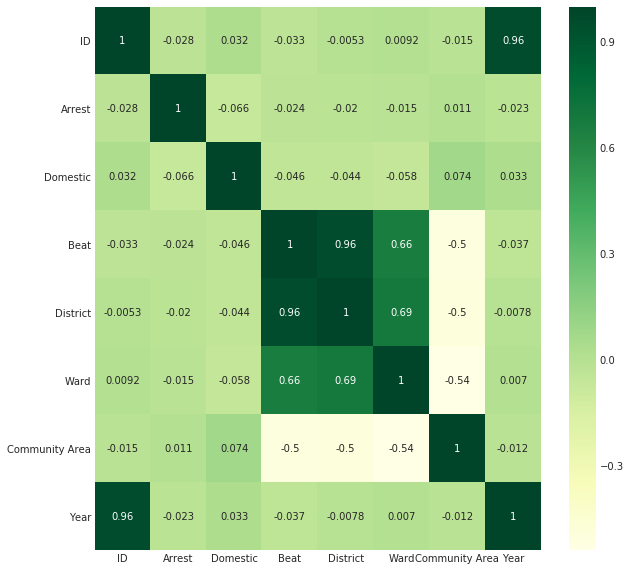

In [5]:
corr = crimes.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGn')
plt.show()

<font color='green' size = '5'> Time Series Analysis </font>

To begin our analysis, we graphed the number of total crimes by the year. This was done to see the trend of crime occurances over the past few years. We also used a histogram to compare the number of crime occurances based on the day to see if the weekend does have a higher overall crime rate. Note- we used similar code in our first project. However, we conducted an analysis comparing crime to the month (as we only used 2016 for our first project).

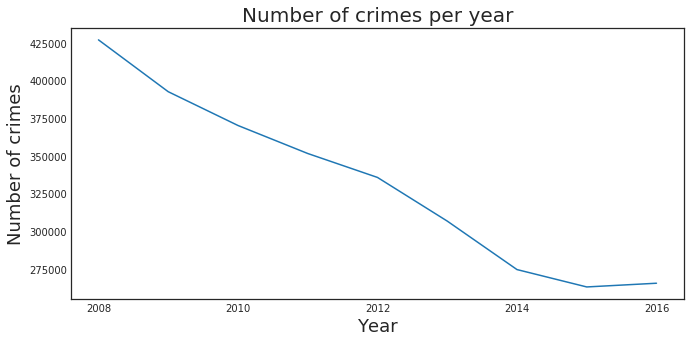

In [6]:
plt.figure(figsize=(11,5))
crimes.resample('Y').size().plot(legend=False)
plt.title('Number of crimes per year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.show()

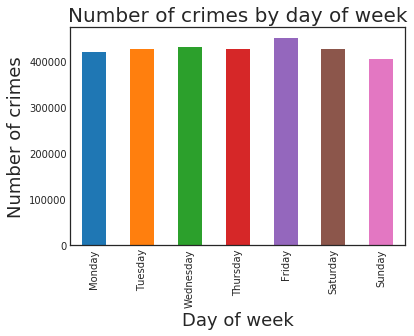

In [7]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='bar')
plt.xlabel('Day of week')
plt.xticks(np.arange(7), days)
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of week')
plt.show()

From this analysis, we can see the overall number of reported crime is decreasing as the years progress. We found this interesting because we thought the trend would be positive (crimes increasing throughout the year) based on what we have heard about in the news. Additionally, we can see that the day is not a relevant factor when it comes to crime, as the number of reported crimes are relatively the same for each day of the week. 

After performing these two analyses, we were curious to see which crimes were most popular from 2008 to 2017. As a result, we calculated the percentage each crime occured throughout the years. 

In [8]:
crimes['Primary Type'].value_counts()/crimes.shape[0]


THEFT                                0.217058
BATTERY                              0.178121
CRIMINAL DAMAGE                      0.111399
NARCOTICS                            0.102753
BURGLARY                             0.063202
OTHER OFFENSE                        0.060717
ASSAULT                              0.060527
MOTOR VEHICLE THEFT                  0.044601
DECEPTIVE PRACTICE                   0.042983
ROBBERY                              0.039389
CRIMINAL TRESPASS                    0.026055
WEAPONS VIOLATION                    0.010941
PUBLIC PEACE VIOLATION               0.008659
PROSTITUTION                         0.007229
OFFENSE INVOLVING CHILDREN           0.007126
CRIM SEXUAL ASSAULT                  0.004180
SEX OFFENSE                          0.003271
INTERFERENCE WITH PUBLIC OFFICER     0.003062
GAMBLING                             0.002031
LIQUOR LAW VIOLATION                 0.001662
ARSON                                0.001503
HOMICIDE                          

We can see from the table above that Theft occured most often over the years, with battery and criminal damage following. Now that we have the overall big picture, we dug a little deeper and graphed the trend of each crime throughout the years. We included all the graphs below, but were mainly interested in Theft, Battery, and Criminal Damage. 


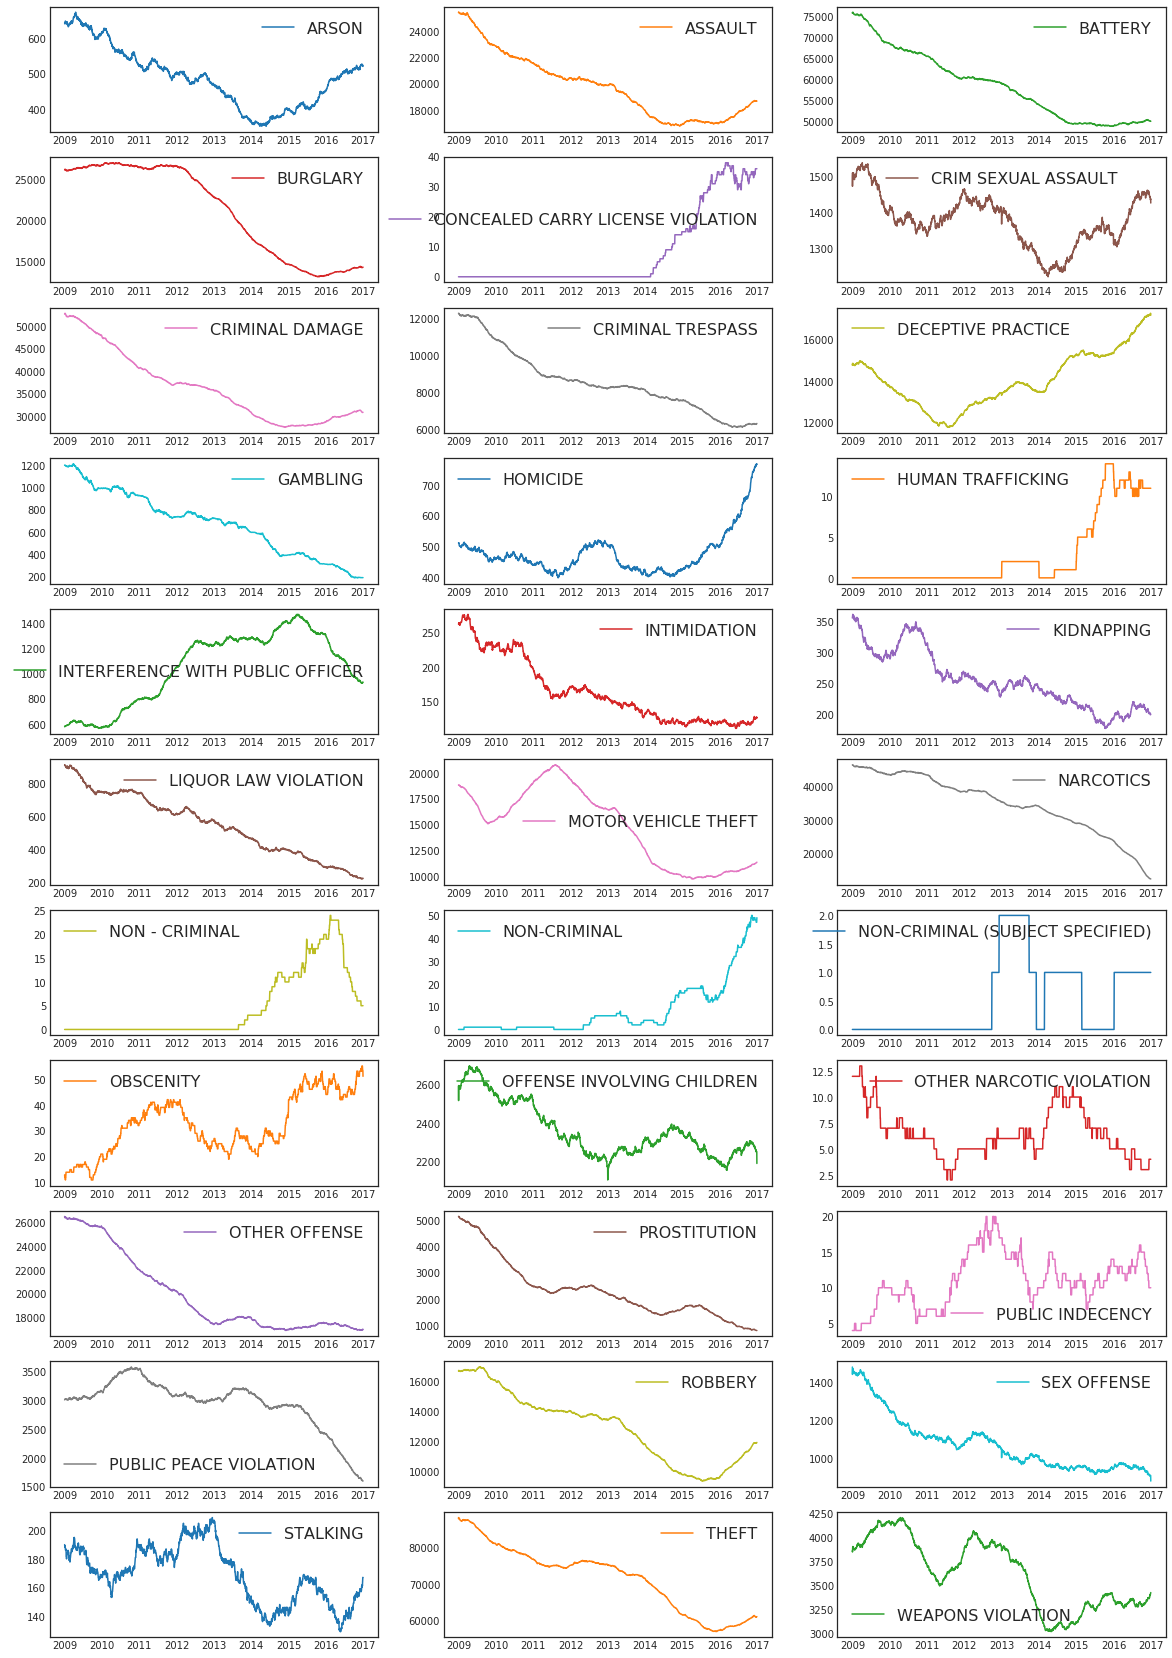

In [9]:
crimesdate = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimesdate.index = pd.DatetimeIndex(crimesdate.index)
plo = crimesdate.rolling(365).sum().plot(figsize=(20, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

From the graphs, we can see that the crime rates for theft, battery, and criminal damage are also decreasing throughout the year. This also conflicts with the various news outlets we looked at, as many of them seem to indicate that crime is increasing, particularly violent crime. We did notice from this analysis that the homicide rates have gone up dramatically, which correlates to what is reported in the news. Additionally, gun charges ('concealed carry license violations') are also increasing. This makes sense because if homicides are increasing, the number of gun charges should also be increasing. One limitation of this analysis is the fact that weapons violations are decreasing overall through the years, but this could be attributable to other sorts of weapons, such as a pocket knife. 

Up to now, we have focused on crime rates throughout the years. However, we were also interested to see the trend of arrests throughout the years. As such, we graphed the number of arrests through the years below. For our purpuses, we analyzed the yearly arrests, but we included monthly , weekely, and daily arrests rates over the years for more detail. Overall, though, the data is the same and we used the yearly rates because the graph was cleaner and easier to decipher a trend. 

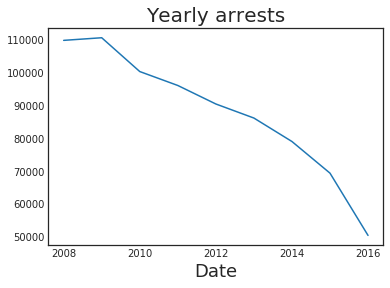

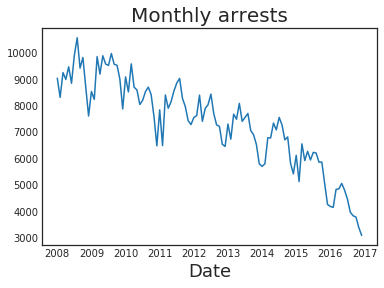

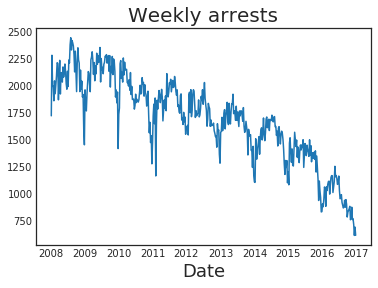

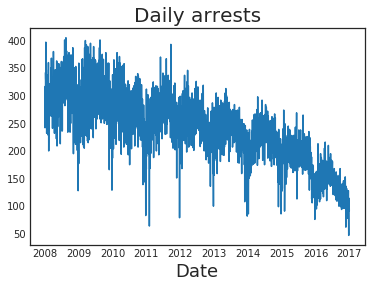

In [10]:
crimes_2008 = crimes.loc['2008']
crimes_2009 = crimes.loc['2009']
crimes_2010 = crimes.loc['2010']
crimes_2011 = crimes.loc['2011']
crimes_2012 = crimes.loc['2012']
crimes_2012 = crimes.loc['2012']
crimes_2013 = crimes.loc['2013']
crimes_2014 = crimes.loc['2014']
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']

arrests = crimes[crimes['Arrest'] == True]['Arrest']

plt.subplot()
# yearly arrest
arrests.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrests.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrests.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrests.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()

As with overall crime rates, the number of arrests are decreasing over the years. This makes sense because if there is less crime commited, there will be less people arrested. However, we wanted to see if the decrease in arrest numbers are due to the decrease in crime rates. As a result, we graphed the number of both crime and arrests in the same plot to compare the two. 

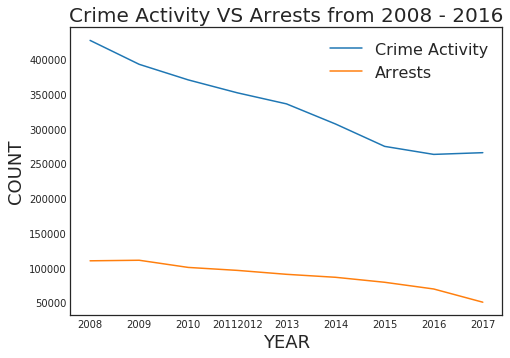

In [11]:
import matplotlib.ticker as ticker

crime_activity = pd.DataFrame(crimes.groupby('Year').size().rename('Count').reset_index())


arrest = crimes[['Year','Arrest']]
arrest_new = arrest[arrest['Arrest'] == True]
arrest_activity = pd.DataFrame(arrest_new.groupby('Year').size().rename('Count').reset_index())



x=['2008','2009','2010','2011''2012','2013','2014','2015','2016','2017']
y=crime_activity['Count']
z=arrest_activity['Count']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.plot(x,y,label='Crime Activity')
ax.plot(x,z,label='Arrests')
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")
ax.set_title("Crime Activity VS Arrests from 2008 - 2016")
ax.legend()

From this plot, we can see that the trend by which crimes and arrests are decreasing looks every similar. For our purposes, we can attribute the decline in arrest rates to the decline in crime rates. However, this is not certain, as correlation does not mean causation. In further projects, we would dig deeper to find a cause to this correlation.

<font color='green' size = '5'> Relationship Between Variables </font>

In the first part of our analysis, we focused mainly on the time series aspect of our data. Next, we focused on the relationship between different variables. To start, we continued with analyzing the arrests. We created a table that shows the number of arrests vs non-arrests for each crime type.

In [12]:
crime_activityddd = pd.DataFrame(crimes.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())

arrestseee = crimes[['Primary Type','Arrest']]
arrest_neweee = arrestseee[arrestseee['Arrest'] == False]
arrest_acteee = pd.DataFrame(arrest_neweee.groupby('Primary Type').size().sort_values(ascending=False).rename('Non_Arrested').reset_index())

arrestsddd = crimes[['Primary Type','Arrest']]
arrest_newddd = arrestsddd[arrestsddd['Arrest'] == True]
arrest_actddd = pd.DataFrame(arrest_newddd.groupby('Primary Type').size().sort_values(ascending=False).rename('Arrested').reset_index())


#This table shows the number of arrested and unarrested cases categorized by "Primary Type"
show_=pd.merge(crime_activityddd, arrest_acteee, on='Primary Type', how='outer')
show_2=pd.merge(show_,arrest_actddd, on='Primary Type', how='outer')
show_2

show_2['Arrest Rate']=show_2['Arrested']/show_2['Count']
show_2=show_2.sort_values('Arrest Rate', ascending=False)
show_2

,Primary Type,Count,Non_Arrested,Arrested,Arrest Rate
13,PROSTITUTION,21591,117,21474,0.994581
3,NARCOTICS,306878,2483,304395,0.991909
18,GAMBLING,6065,54,6011,0.991096
26,PUBLIC INDECENCY,95,1,94,0.989474
19,LIQUOR LAW VIOLATION,4963,80,4883,0.983881
17,INTERFERENCE WITH PUBLIC OFFICER,9145,656,8489,0.928267
28,CONCEALED CARRY LICENSE VIOLATION,85,12,73,0.858824
25,OBSCENITY,294,58,236,0.802721
11,WEAPONS VIOLATION,32675,6617,26058,0.797490
12,PUBLIC PEACE VIOLATION,25861,6957,18904,0.730985


Again, we plotted all the crime types but mainly focused on Theft, Battery, and Criminal Damage. From the table, we can see that the majority of these cases are unresolved, with Criminal Damage having one of the lowest percentages of arrest to total occurances. 

We also noticed that crimes relating to Prostitution, Narcotics, and Gambling have the highest percentage of arrests. As such, we can assume that the Chicago Police Department is focusing on these crimes or may have more tools availible to pursue such crimes. 

Next, we ploted a similar table to show the number of arrests vs non-arrests by District. Instead of including percentages within the table, we included a bar graph that depicts the table (so we can visually see what is going on).



In [13]:
crime_activityfff = pd.DataFrame(crimes.groupby('District').size().sort_values(ascending=False).rename('Count').reset_index())

arrestsggg = crimes[['District','Arrest']]
arrest_newggg = arrestsggg[arrestsggg['Arrest'] == False]
arrest_actggg = pd.DataFrame(arrest_newggg.groupby('District').size().sort_values(ascending=False).rename('Non_Arrested').reset_index())

arrestsfff = crimes[['District','Arrest']]
arrest_newfff = arrestsfff[arrestsfff['Arrest'] == True]
arrest_actfff = pd.DataFrame(arrest_newfff.groupby('District').size().sort_values(ascending=False).rename('Arrested').reset_index())



#This table shows the number of arrested and unarrested cases categorized by "District"
show_3=pd.merge(crime_activityfff, arrest_actggg, on='District', how='outer')
show_4=pd.merge(show_3,arrest_actfff, on='District', how='outer')
show_5=show_4.sort_values('District')
show_5=show_5.fillna(0)
show_5=show_5.astype({"District": int})
show_5

,District,Count,Non_Arrested,Arrested
15,1,115114,85269,29845.0
14,2,125595,95476,30119.0
6,3,152930,112297,40633.0
5,4,175703,133628,42075.0
9,5,134126,98595,35531.0
3,6,177576,127860,49716.0
2,7,178544,126524,52020.0
0,8,206850,156602,50248.0
7,9,147642,106127,41515.0
12,10,130397,89561,40836.0


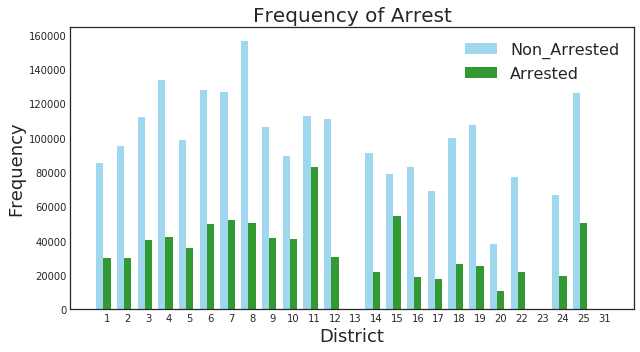

In [14]:
Non_Arrested = show_5['Non_Arrested']
Arrested = show_5['Arrested']
 
# create plot
fig, ax = plt.subplots(figsize=(9,5))
index = np.arange(25)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Non_Arrested, bar_width,
                 alpha=opacity,
                 color='skyblue',
                 label='Non_Arrested')
 
rects2 = plt.bar(index + bar_width, Arrested, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Arrested')
 
plt.xlabel('District')
plt.ylabel('Frequency')
plt.title('Frequency of Arrest')
plt.xticks(index + bar_width, show_5['District'])
plt.legend()
 
plt.tight_layout()
plt.show()

From the table and the following bar graph, we can see that District 11 has the most arrests in Chicago. Conversly, District 8 has the most non-arrests and District 20 has the least number of arrests made. We also noticed that District 13 and 23 only had 1 crime occur, which seemed odd. However, when we looked into this, we found that there is no District 13 or 23 listed on the CPD website. As such, we believe there may have been a typo when compiling the data. 

<font color='green' size = '5'> ARMA and Density Models </font>

Up to now, we have analyzed the data using time-series anayses and we have looked at the relationship between certain variables. Next, we used our data and forecasted a projected number of thefts that would occur in 2017 (our data only went to 2016). We chose theft because it has the highest frequency among all the crimes. Finally, we also included a density model of our data. 

To forecast the number of crimes involving theft, we used the ARMA Model, since it is one of the simplest methods availible. ARMA modeling includes computing an autocorrelation on our data, completing an ARMA model fit, showing these results. Beginning with the autocorrelation, we can reduce the white noise in our data and the residuals are correlated with each other. The autocorrelation can be seen below:

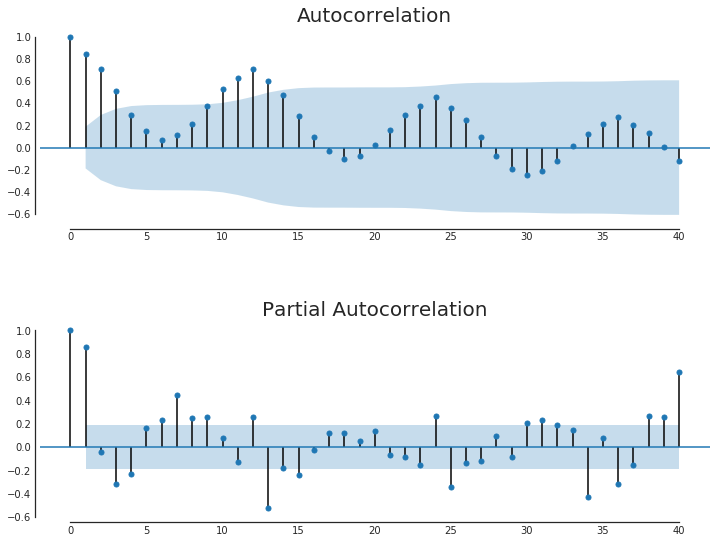

In [15]:
crimes.rename(columns = {'ID':'Numbers'}, inplace=True)
a = ['THEFT']
theft=crimes[crimes['Primary Type'].isin(a)]

crimestypebydate=theft.groupby(['Primary Type','NewDate']).count().reset_index()
crimestypebydate = crimestypebydate.set_index('NewDate')
data = crimestypebydate.Numbers

import statsmodels.api as sm

fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(211)
_ = sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
sns.despine(offset=5, trim=True, ax=ax1)

ax2 = fig.add_subplot(212)
_ = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)
sns.despine(offset=5, trim=True, ax=ax2)

Here are the results of the ARMA modeling:

In [16]:
arma_model = sm.tsa.ARMA(data, (7, 1))
arma_res = arma_model.fit(trend='c', disp=True)
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                Numbers   No. Observations:                  108
Model:                     ARMA(7, 1)   Log Likelihood                -803.521
Method:                       css-mle   S.D. of innovations            400.659
Date:                Sun, 09 Dec 2018   AIC                           1627.041
Time:                        11:26:11   BIC                           1653.863
Sample:                    01-31-2008   HQIC                          1637.917
                         - 12-31-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6201.7814    948.730      6.537      0.000    4342.305    8061.257
ar.L1.Numbers     1.1341      0.104     10.865      0.000       0.929       1.339
ar.L2.Numbers     0.0330      0.152     

In [17]:
print(arma_res.params)

const            6201.781364
ar.L1.Numbers       1.134062
ar.L2.Numbers       0.033020
ar.L3.Numbers      -0.089535
ar.L4.Numbers      -0.288786
ar.L5.Numbers      -0.022103
ar.L6.Numbers      -0.182680
ar.L7.Numbers       0.409109
ma.L1.Numbers      -0.627712
dtype: float64


Now, we can use this model to plot the residuals

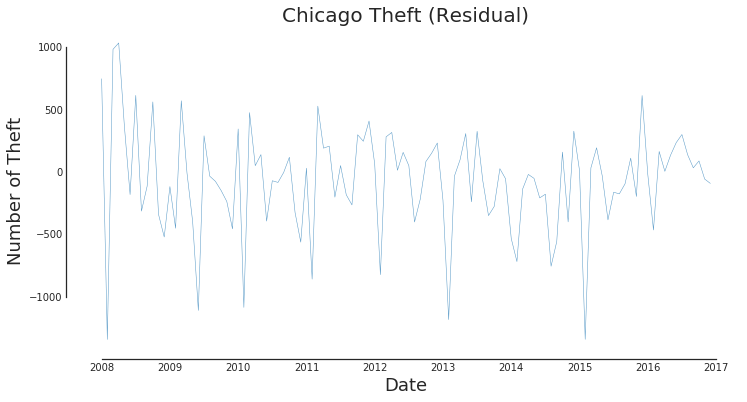

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
arma_res.resid.plot(lw=0.5, alpha=0.75)

ax.set(title='Chicago Theft (Residual)',
      xlabel='Date', ylabel = 'Number of Theft')

sns.despine(offset=5, trim=True)


Next, we created a QQ plot to see how well the model fits with our data.

In [19]:
from scipy import stats

resid = arma_res.resid
stats.normaltest(resid)

NormaltestResult(statistic=10.949784335573717, pvalue=0.0041906804159651066)

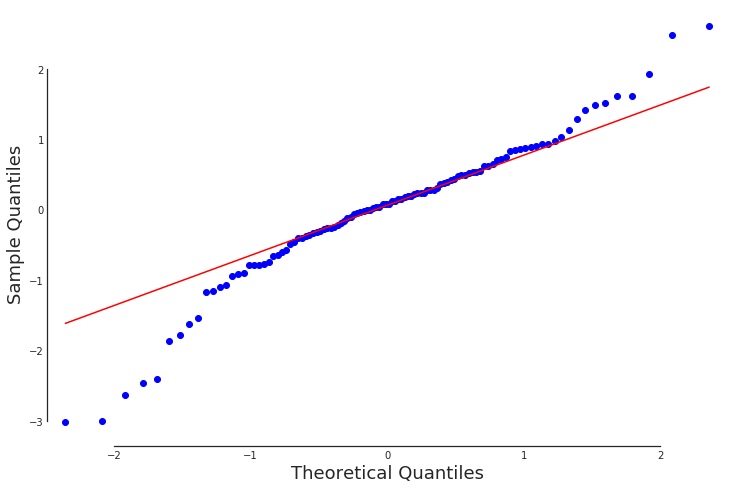

In [20]:
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
_ = qqplot(resid, line='q', ax=ax, fit=True)

sns.despine(offset=5, trim=True)

From this QQ plot, we can see that the majority of the data fits with the model. There are, however, some variances towards the ends of the plot which we need to keep in mind. We still have confidence in our forecast, but the variances are something to keep in mind.

Moving forward, we created additional autocorrelation plots based on our model.

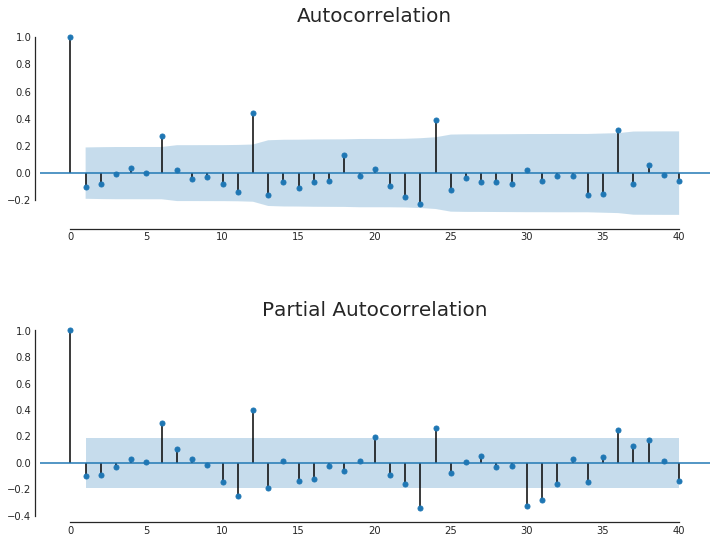

In [21]:
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(211)
_ = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
sns.despine(offset=5, trim=True, ax=ax1)

ax2 = fig.add_subplot(212)
_ = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
sns.despine(offset=5, trim=True, ax=ax2)

Again, the majority of our data fits but we do see some variance in these autocorrelation plots. This reiterates what we found in the QQ plot, as most of the data fits the model, but there are some variances to keep account of. 

We moved forward with the forecasted model below:

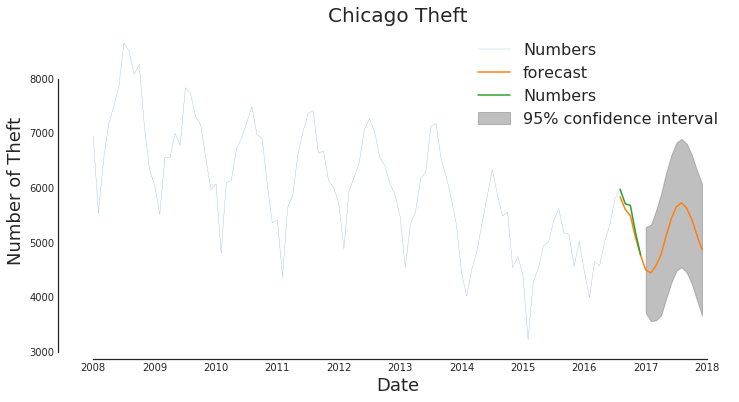

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = data.plot(ax=ax, alpha=0.7, lw=0.25)
fig = arma_res.plot_predict('2016-8', '2017-12', dynamic=True, ax=ax, plot_insample=True)

ax.set(title='Chicago Theft',
      xlabel='Date', ylabel = 'Number of Theft')

sns.despine(offset=5, trim=True)

Looking at the data for the end of 2016, we can see that the actual data (Numbers) and forecasted data seem to line up nicely. As a result, we are confident in our forecasted numbers for 2017. 

From this forecast, we can see that the number of crimes related to theft are expected to continue to overall continue to decrease in 2017. There is, however, a projected spike between 2017 and 2018. Additionally, the forecasted point for 2018 is a bit higher than 2017, indicating there might be a slight increase between these two years, even though the overall trend is still decreasing. 



Next, we created Density Models for our data. Using kernel density estimates, we can make inferences about the population, even though only have a sample of the data. For the density model, we limited our data to the year 2016 and only included 100,000 samples, as seen below in our code. Also, we looked at the relationship between the District number, the month, and the frequency of crime. 

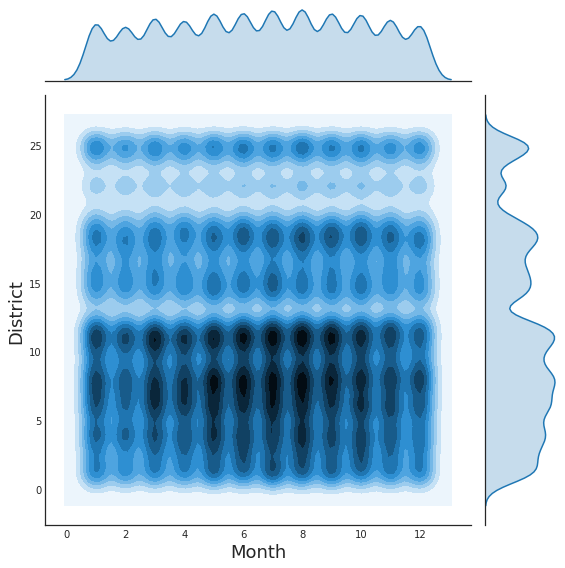

In [23]:
crimes2016=df.loc[df.Year==2016]

c2016sample=crimes2016.sample(100000)

c2016sample['Month']=pd.to_datetime(c2016sample['Date']).dt.month

ax = sns.jointplot(x='Month', y='District', data=c2016sample, kind='kde', stat_func=None, size=8)

From our density model, we can see that Districts 5-10 have the most amount of crime, specifically from March to October. These months include the summer months. This reiterates our findings from the first project of summer months having a higher crime rate. 

Next, we created another density model to analyze the relationship between District number, the month, and limited to only crimes relating to theft. 

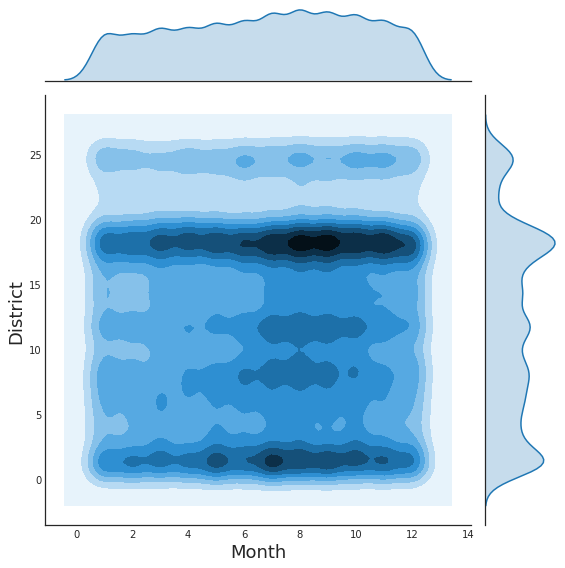

In [24]:
c2016theftsample=c2016sample.loc[c2016sample['Primary Type']=='THEFT']
ax = sns.jointplot(x='Month', y='District', data=c2016theftsample, kind='kde', stat_func=None, size=8)

When we limit the density model to just Theft, we see a very different representation of the data. In this density model, District 17-20 has the rate of theft, specifically in the months between June and October. Again, these months contain the summer months, which makes sense based on our findings from the last project. 

<font color='green' size = '5'> Conculsion and Moving Forward </font>

From our analysis, we identified the decreasing trend of crime rates over the years, along with a decreasing trend for arrest rates. We also found that the crimes with the highest occurrence (theft, battery and criminal damage) had very low arrest rates. The highest arrest rates belonged to Prostitution, Narcotic crimes, and Gamgling. Finally, we forecasted the data, which revealed there may be a slight uptick in theft from 2017 to 2018. However, the overall trend is still decreasing. 

Additionally, we can see the districts with the most theft and overall crime from our density models. Using this information, we can provide some solutions to lower the rate of crime. For one, we suggest adding warning signs in the districts with higher crime rates, specified to which crime occurs the most in that area. By doing this, poeple in those districts will be aware of their surrondings and can potentially mitigate their risk of being a crime victim. 

Throughout our analysis, we noticed a few limitations in our data. When using the ARMA model to forecast, we noticed some variances from our data and the ARMA model, which could signal a problem with our forecast. The variances were not major, however, but are something to keep in mind. Another limitation of our data is that we could not find actual causes to our findings, such as the number of both arrests and crimes going down. Even though we can infer the two are related, we cannot be completly sure. Finally, we did find an error in the data, as there are no district 13 or district 23. However, due to only 1 crime being associated with each, we did not think this was significant enough to impact our findings. It should be kept in mind, though, when considering our analysis. 

Moving forward, we would like to complete this analysis using a lot more years, so we can get a more developed picture of how crime in Chicago is behaving over time. Additionally, we would like to find actual causes for the variables that are correlated so we can definitly attribute a link between the two. Finally, we could compare crime rates in Chicago to the national average to see if the trend in solely in Chicago or if it is a nationwide occurence. 

As always, if there is anything in this report that is unclear or you would like further information about, please do not hesititate to contact us. 